# Modeling: try PCR method
* Try modeling with pcr method

## Import packages

In [31]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn import preprocessing, svm
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error

#Use to ignore convergence warnings
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import FitFailedWarning
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import __version__ as sklearn_version
import datetime

import joblib

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=FitFailedWarning)


# pd.set_option('display.max_columns', None)
# pd.reset_option('max_rows')
# np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

## Load X and y data sets

In [32]:
# import X and y training and test sets

X = pd.read_csv('../../data/train_test/X_alt')
y = pd.read_csv('../../data/train_test/y_alt')

X_train = pd.read_csv('../../data/train_test/X_train_74_26')

X_test = pd.read_csv('../../data/train_test/X_test_74_26')

y_train = pd.read_csv('../../data/train_test/y_train_alt_74_26')

y_test = pd.read_csv('../../data/train_test/y_test_alt+74_26')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=42)


In [34]:
pcr_pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('lr', LinearRegression())])

In [35]:
num_components = [int(n) for n in np.logspace(start=1, stop=7, num=10, base=2)]
num_components

[2, 3, 5, 8, 12, 20, 32, 50, 80, 128]

In [36]:
pcr_param_grid = {'pca__n_components':num_components}


In [37]:
pcr_grid = GridSearchCV(pcr_pipe, pcr_param_grid, cv=5)
pcr_grid.fit(X_train,y_train)

pcr_grid.best_params_, pcr_grid.best_score_

/home/wkc/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [ 0.04122748  0.0312747   0.1046319   0.0909843   0.07183669  0.14690736
  0.08864227  0.02397131 -0.10777091         nan]
  warnings.warn(


({'pca__n_components': 20}, 0.14690736322176082)

In [38]:
pcr_best = pcr_grid.best_estimator_
pcr_mean_score = pcr_grid.cv_results_['mean_test_score']
pcr_std_score = pcr_grid.cv_results_['std_test_score']

num_comp_vals = [n for n in pcr_grid.cv_results_['param_pca__n_components']]
num_comp_best = pcr_best.get_params()['pca__n_components']

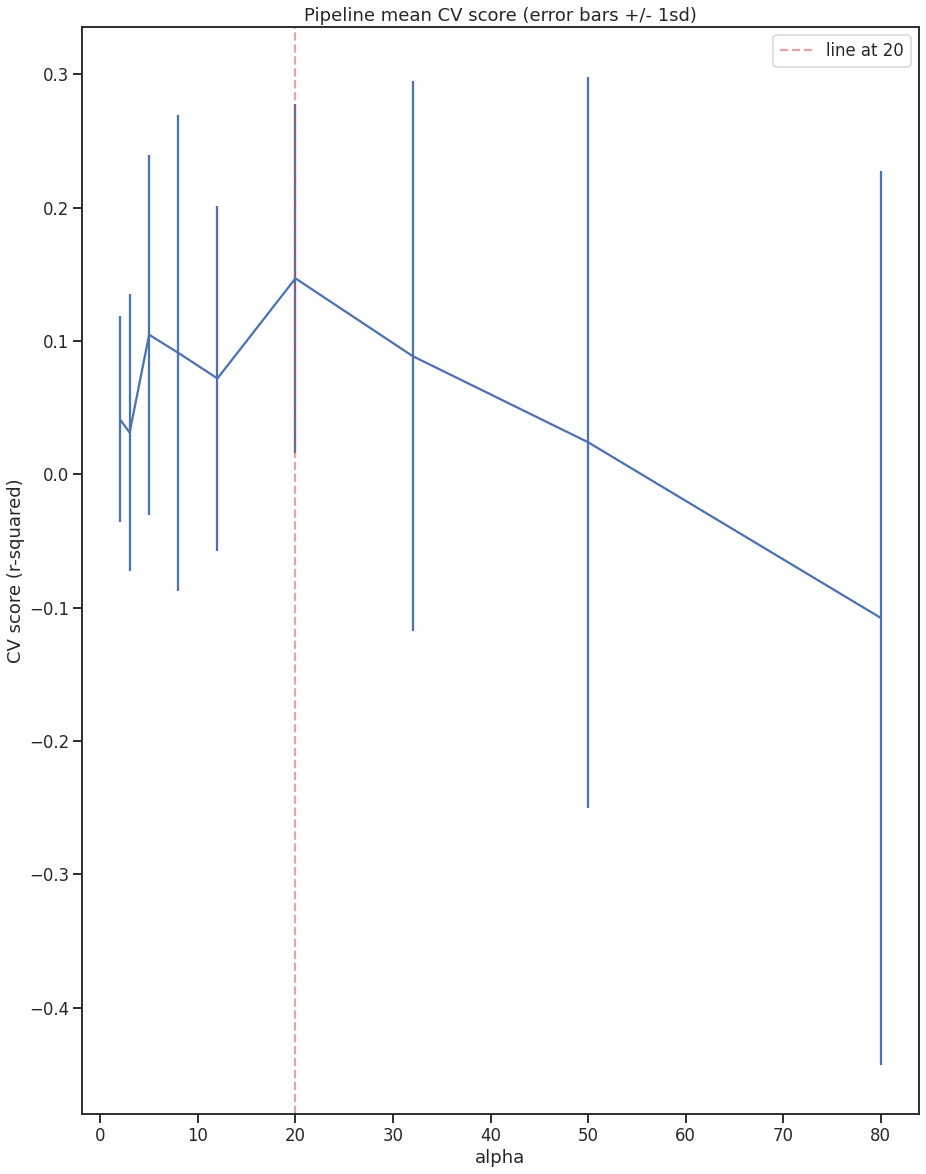

In [39]:
plt.figure(figsize=(15,20))
plt.errorbar(num_comp_vals, pcr_mean_score, yerr=pcr_std_score)
plt.axvline(x=num_comp_best, c='r', ls='--', alpha=.5, label='line at {}'.format(num_comp_best))
# plt.xticks(np.arange(0,1400, step=50))
plt.xlabel('alpha')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)')
plt.legend();

In [40]:
pcr_best.get_params()['pca'].explained_variance_ratio_
np.cumsum(pcr_best.get_params()['pca'].explained_variance_ratio_)

array([0.13517965, 0.24217132, 0.30774779, 0.36065153, 0.40451673,
       0.44453916, 0.483327  , 0.51465906, 0.54348802, 0.56993453,
       0.59152442, 0.61104701, 0.62932582, 0.64688818, 0.66417338,
       0.67913041, 0.6931123 , 0.70613381, 0.71852834, 0.73000438])

## try 10-30 components

In [13]:
num_components = np.arange(10,30)
pcr_param_grid = {'pca__n_components':num_components}


In [14]:
pcr_grid = GridSearchCV(pcr_pipe, pcr_param_grid, cv=5)
pcr_grid.fit(X_train,y_train)

pcr_grid.best_params_, pcr_grid.best_score_

({'pca__n_components': 18}, 0.17426166028328344)

In [15]:
pcr_best = pcr_grid.best_estimator_
pcr_mean_score = pcr_grid.cv_results_['mean_test_score']
pcr_std_score = pcr_grid.cv_results_['std_test_score']

num_comp_vals = [n for n in pcr_grid.cv_results_['param_pca__n_components']]
num_comp_best = pcr_best.get_params()['pca__n_components']

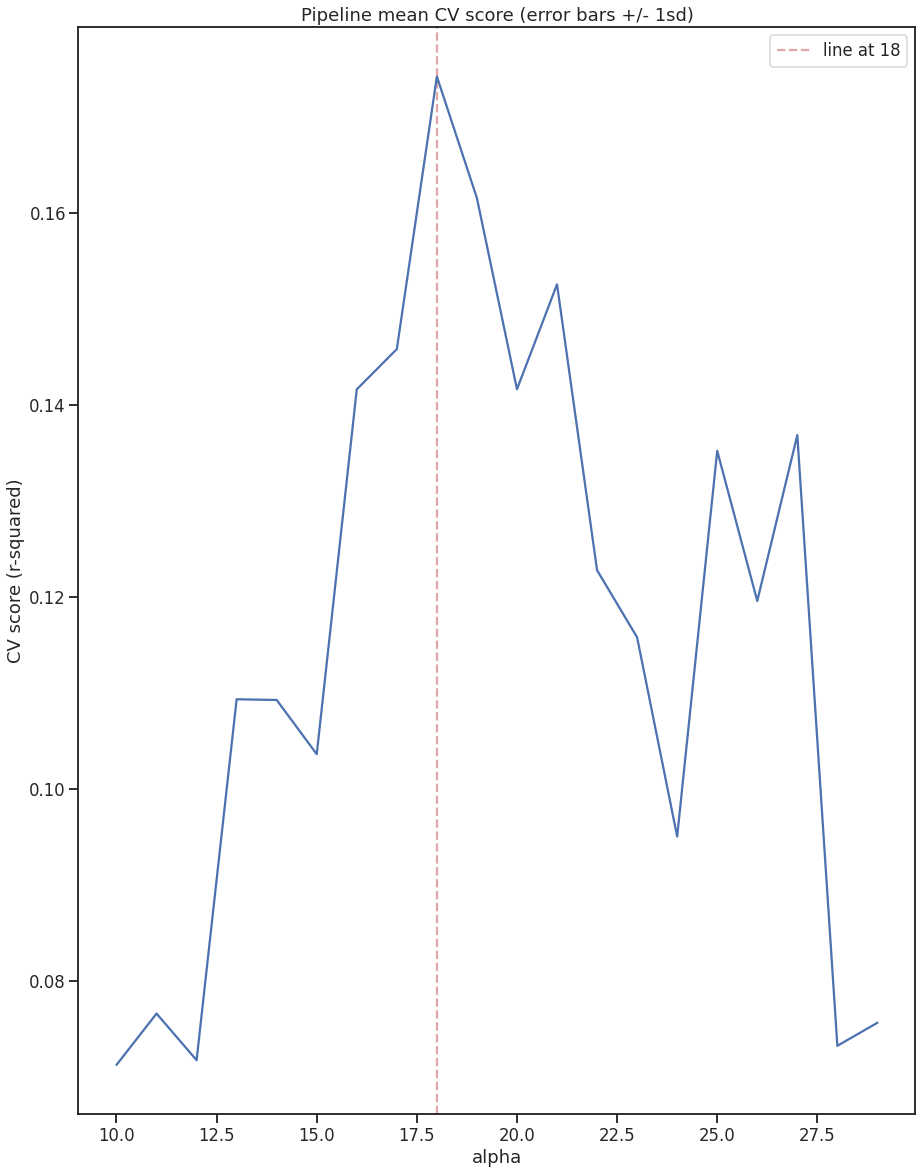

In [16]:
plt.figure(figsize=(15,20))
plt.errorbar(num_comp_vals, pcr_mean_score, )
plt.axvline(x=num_comp_best, c='r', ls='--', alpha=.5, label='line at {}'.format(num_comp_best))
# plt.xticks(np.arange(0,1400, step=50))
plt.xlabel('alpha')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)')
plt.legend();

## evaluation of PCR
It appears with pcr we can achieve a train score .17 with 18 estimators

In [26]:
dir(pcr_best.get_params()['pca'])

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'scor

In [30]:
pcr_best.get_params()['pca'].explained_variance_ratio_
np.cumsum(pcr_best.get_params()['pca'].explained_variance_ratio_)

array([0.13517965, 0.24217132, 0.30774779, 0.36065153, 0.40451673,
       0.44453916, 0.48332694, 0.51465882, 0.54348773, 0.56993407,
       0.59152244, 0.61104377, 0.62932156, 0.64686898, 0.66414435,
       0.67904681, 0.6929551 , 0.705957  ])

In [41]:
param_grid  = {'pca__n_components':[100]}
pcr_grid_2 = GridSearchCV(pcr_pipe, param_grid, cv=5)
pcr_grid_2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr', LinearRegression())]),
             param_grid={'pca__n_components': [100]})

In [44]:
pcr_2 = pcr_grid_2.best_estimator_
pcr_grid_2.best_score_

-0.3730935381539493

In [46]:
for index, score, in enumerate(np.cumsum(pcr_2.get_params()['pca'].explained_variance_ratio_)):
    print(index, score)

0 0.1351796520063638
1 0.24217132446371725
2 0.3077477918873587
3 0.3606515329107114
4 0.4045167369032985
5 0.4445391672250757
6 0.4833270125340115
7 0.51465908694853
8 0.5434880799442764
9 0.5699347289216233
10 0.5915251839418715
11 0.6110483558492659
12 0.6293289950188495
13 0.6468934278314855
14 0.6641816576337283
15 0.6791408935457507
16 0.6931256537849589
17 0.7061678302083044
18 0.7185784374757156
19 0.7301970490033054
20 0.7413860716905671
21 0.7519427396708662
22 0.7617486147277819
23 0.7711401115047272
24 0.7801247977049722
25 0.788877268047083
26 0.7974622655601477
27 0.8054648831620821
28 0.812877455459462
29 0.820181270443472
30 0.8268887815615448
31 0.8333150971282202
32 0.8395369089039794
33 0.8454761330039317
34 0.8511398828287383
35 0.856517632726034
36 0.8617497867752408
37 0.8667913592859245
38 0.8716963461883663
39 0.8764133536932817
40 0.8809807185526782
41 0.8851454343135691
42 0.8892436437158708
43 0.8932258474720807
44 0.8971030764844611
45 0.9007192903130836
46 

45 components explain 90% of our variance in the data

So try seeing whether 40-50 components would make a difference in score

In [47]:
param_grid  = {'pca__n_components':np.arange(40,50)}
pcr_grid_3 = GridSearchCV(pcr_pipe, param_grid, cv=5)
pcr_grid_3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr', LinearRegression())]),
             param_grid={'pca__n_components': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [48]:
pcr_3 = pcr_grid_3.best_estimator_
pcr_grid_3.best_score_




0.10722140940485403